In [18]:
from qiskit import *
from math import log2, ceil
from qiskit.circuit.library import XGate, UnitaryGate

In [7]:
def encode_table(l: list[int], size: int) -> list[str]:
    """
    l: list to be encoded
    size: how many bits elements should have in it's encoding
    """
    encoded_l = []
    for num in l:
        encoded_l.append((bin(num)[2:]).rjust(size,"0"))
    return encoded_l

l = [4,2,3,1,6,5,8,7]
print(encode_table(l, 4))

['0100', '0010', '0011', '0001', '0110', '0101', '1000', '0111']


In [17]:
def generate_control_strings(size: int) -> list[str]:
    """
    size: list size
    """
    c_strings = []
    string_size = ceil(log2(size))
    for i in range(size):
        c_strings.append((bin(i)[2:]).rjust(string_size,"0"))
    return c_strings

print(generate_control_strings(9))

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000']


In [ ]:
def xor_data_circuits(l: list[str], size: int) -> list[QuantumCircuit]:
    """
    create a list of circuits wich cnots the data in list to qubits
    """
    circuits = []
    for bit_string in l:
        qc = QuantumCircuit(size + 1)
        for bit in range(len(bit_string)):
            if bit_string[bit] == "1":
                qc.cx(0, size-bit)
        circuits.append(qc)
    return circuits

circs = xor_data_circuits(['0100', '0010', '0011', '0001', '0110', '0101', '1000', '0111'], 4)

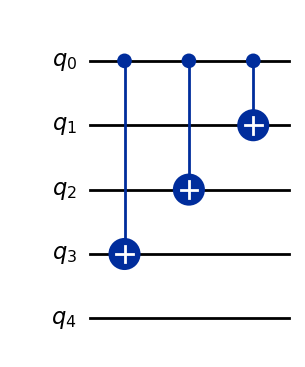

In [45]:
circs[7].draw("mpl")

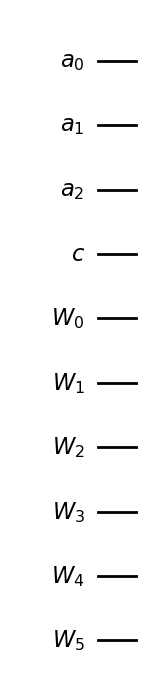

In [ ]:
def compute_lookup_table(W: int, l: list[int], optimization: int = 0) -> QuantumCircuit:
    """
    a = input; input size in bits is log2(len(l)), ex: if len(l) = 8, then input size is 3, log2(8)=3, 2^3 = 8
    w = output size in bits
    l = table to be computed
    c = controll qubit
    """
    index_size = int(log2(len(l)))
    a = QuantumRegister(index_size, name="a")
    w = QuantumRegister(W, name="W")
    c = QuantumRegister(1, name="c")
    quantum_circuit = QuantumCircuit(a, c, w)

    c_strings = generate_control_strings(index_size)
    e_table = encode_table(l, W)


    match optimization:
        case 0:

    
    return quantum_circuit

compute_lookup_table(6, [0,0,0,0,0,0,0,0]).draw("mpl")